In [1]:
#!pip install tabulate
from coin_game_env import CoinGameEnv
from input_agent import InputAgent
from random_agent import RandomAgent
from play import play_vs_other_agent
from UONI import UONI
from Minimax_agent import Minimax_agent
from Expectimax_agent import ExpectimaxAgent

In [2]:
env = CoinGameEnv(grid_size=5)
input_agent = InputAgent()

Input Agents

In [7]:
#play_vs_other_agent(env, agent1=input_agent, agent2=input_agent, render=True)

Random Agents

In [3]:

agent1 = Minimax_agent(1)
agent12=ExpectimaxAgent(1)
play_vs_other_agent(env, agent1, agent2=RandomAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   | O   | O   | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+


AttributeError: 'Minimax_agent' object has no attribute 'nim_sum'

Minimax Random Agent vs UONI (Universal Optimization Neural Interface)

In [3]:
import matplotlib.pyplot as plt
import wandb
# Assuming ws is a list of winners
def print_graph(ws, level):
    wandb.init(project="coin_game")
    winners = ["UONI", "Minimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    fig, ax = plt.subplots()
    plt.bar(winners, win_counts)
    
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()
    return fig

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: santimoron001 (ia-santiago-moron). Use `wandb login --relogin` to force relogin


100%|██████████| 5/5 [01:08<00:00, 13.75s/it]


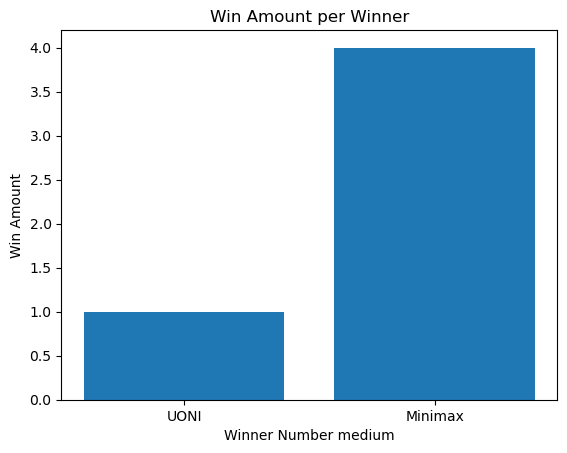

100%|██████████| 5/5 [01:12<00:00, 14.47s/it]


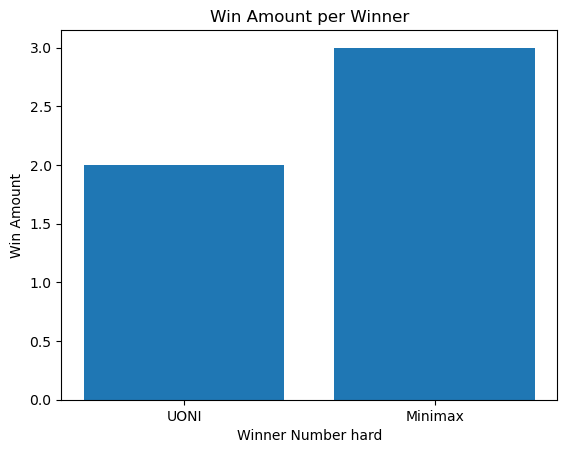

In [4]:
from tqdm import tqdm
import wandb

wandb.init(project="coin_game")

ws = {'medium':[], 'hard':[]}
for level in ['medium', 'hard']:
    for i in tqdm(range(5)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=Minimax_agent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=Minimax_agent(1), agent2=UONI(2, level), render=False))
        
    fig = print_graph(ws[level], level)
    wandb.log({"Winners": wandb.Image(fig)})

wandb.finish()
        

UONI vs Expectimax

In [ ]:
import matplotlib.pyplot as plt
import wandb
# Assuming ws is a list of winners
def print_graph(ws, level):
    wandb.init(project="coin_game")
    winners = ["UONI", "Expectimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    fig, ax = plt.subplots()
    plt.bar(winners, win_counts)
    
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()
    return fig

100%|██████████| 5/5 [02:55<00:00, 35.08s/it]


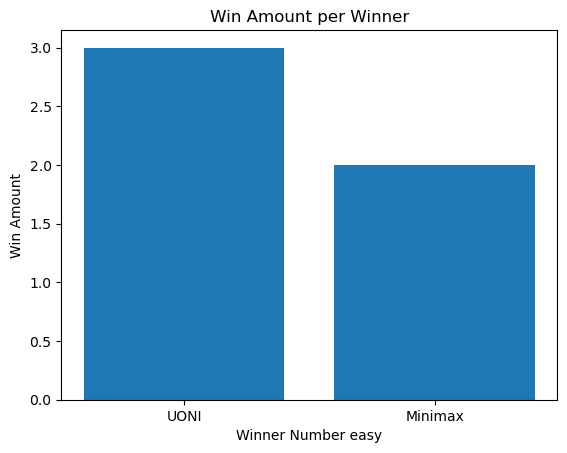

100%|██████████| 5/5 [06:29<00:00, 77.87s/it] 


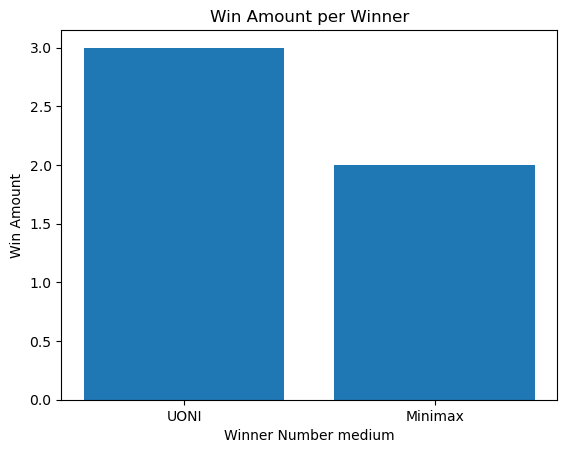

100%|██████████| 5/5 [06:20<00:00, 76.09s/it]


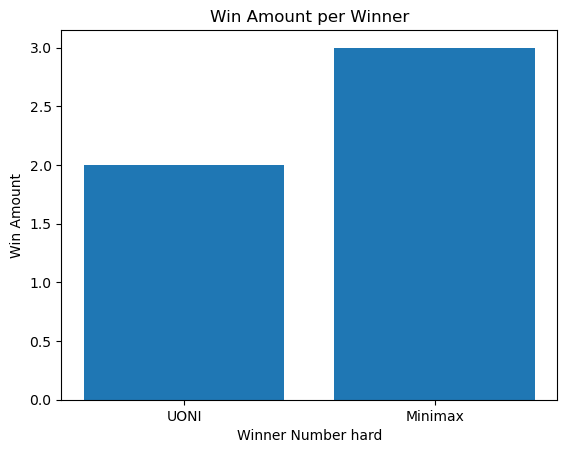

In [ ]:
from tqdm import tqdm
import wandb
wandb.init(project="coin_game")
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(5)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=ExpectimaxAgent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=ExpectimaxAgent(1), agent2=UONI(2, level), render=False))
    fig = print_graph(ws[level], level)
    wandb.log({"Winners": wandb.Image(fig)})

wandb.finish()

Testing entre agentes propios

In [4]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def print_graph(ws, level):
    winners = ["Expectimax", "Minimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 20/20 [03:29<00:00, 10.48s/it]


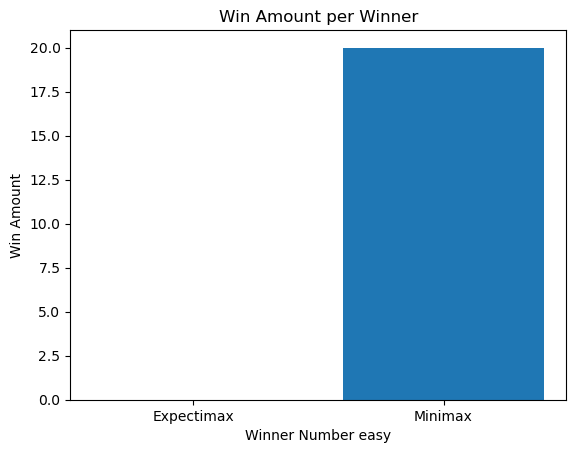

 60%|██████    | 12/20 [01:19<00:52,  6.60s/it]


KeyboardInterrupt: 

In [8]:
from tqdm import tqdm

ws = {'tests':[]}
for i in tqdm(range(20)):
    if i%2 == 0:
        ws['tests'].append(play_vs_other_agent(env, agent1=ExpectimaxAgent(1), agent2=Minimax_agent(2), render=False))
    else:
        ws['tests'].append(3-play_vs_other_agent(env, agent1=Minimax_agent(1), agent2=ExpectimaxAgent(1), render=False))
print_graph(ws['tests'], 'tests')